##📌 EXTRACCIÓN

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/palmeiros/ChallengeTelecomX2/refs/heads/main/df_limpo.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [42]:
# Ver las columnas disponibles con columns
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [43]:
#verificar la estructura general con info ()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

##Preparación de los Datos


 Remover columnas irrelevantes, en este caso customerID, la cual es meramente infiormativa y no afecta al modelo.

In [44]:
df = df.drop(columns=['customerID'], errors='ignore')

**Agrupación de No y No service**

Con el fin de reducir multicolinealidad reasignaremos con un "No" a los valores como "No internet service". Esto aplica para 6 variables: OnlineSecurity, StreamingTV, StreamingMovies, TechSupport, OnlineSupport, DeviceProtection, todas ellas relacionadas a "Internet"

**One-Hot Encoding**

Cambiar las columnas categóricas a numéricas para poder trabajar con variables numéricas en modelación, esto se hará con One-Hot Encopding

In [78]:
# para crear un nuevo dataset hacemos una copia
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]
df_clean = df.drop(columns=["customerID"])
df_encoded = pd.get_dummies(df_clean, drop_first=True)
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Verificamos resultados con df_encoded

df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,False,False,False,True,False,True,False,False,False,True


Obtenemos más información de los datos con info ()

In [46]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

# Verificación de los valores nulos


In [47]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [48]:
# Verificamos el número de valores nulos en las dos columnas
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


Observamos que hay dos columnas que tienen valores nulos: **Total.Day** y **account.Charges.Total**. Vamos a eliminar las filas con valores nulos por seguridad y simplicidad, esto asegura que los datos usados estén completos.

In [49]:
# Eliminamos filas con valores nulos
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

Comprobamos resultados con sum ()

In [50]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


En este punto haremos una búsqueda de la **proporción de clientes** que cancelaron contra los que permanecieron. Esto lo haremos con value_counts () de la librería pandas.

In [51]:
# Conteo de clientes que cancelaron y los que no
print(df["Churn"].value_counts())

# Proporción de cada clase
print(df["Churn"].value_counts(normalize=True))

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


**Normalización/Estandarización**


La normalización es un paso común en el preprocesamiento de datos, especialmente importante para algoritmos que son sensibles a la escala de los atributos, como: KNN, Redes Neuronales, Regresión Logística y SVM. Vamos a aplicar la normalización Min-Max que transforma los valores al rango [0,1]. Objetivo: que las variable numéricas contribuyan con el mismo peso al modelo.

In [52]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas (excepto la variable objetivo, si ya está separada)
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicamos la normalización
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

# Mostramod los datos normalizados
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0.0,Yes,Yes,0.125000,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,0.484680,0.471144,0.066294
1,No,Male,0.0,No,No,0.125000,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,0.431755,0.414428,0.060420
2,Yes,Male,0.0,No,No,0.055556,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.523677,0.553731,0.030239
3,Yes,Male,1.0,Yes,No,0.180556,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.754875,0.793532,0.140670
4,Yes,Female,1.0,Yes,No,0.041667,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0.699164,0.653234,0.028687


## ≡ Correlación entre las variables


Empezaremos por revisar la matriz de correlación para identificar relaciones entre las variables numéricas para identificar las variables que muestran una mayor correlación con la variable de respuesta (churn).

In [53]:
corr = df_encoded.corr()

Para visualizarlo mejor creamos un mapa de calor o heatmap

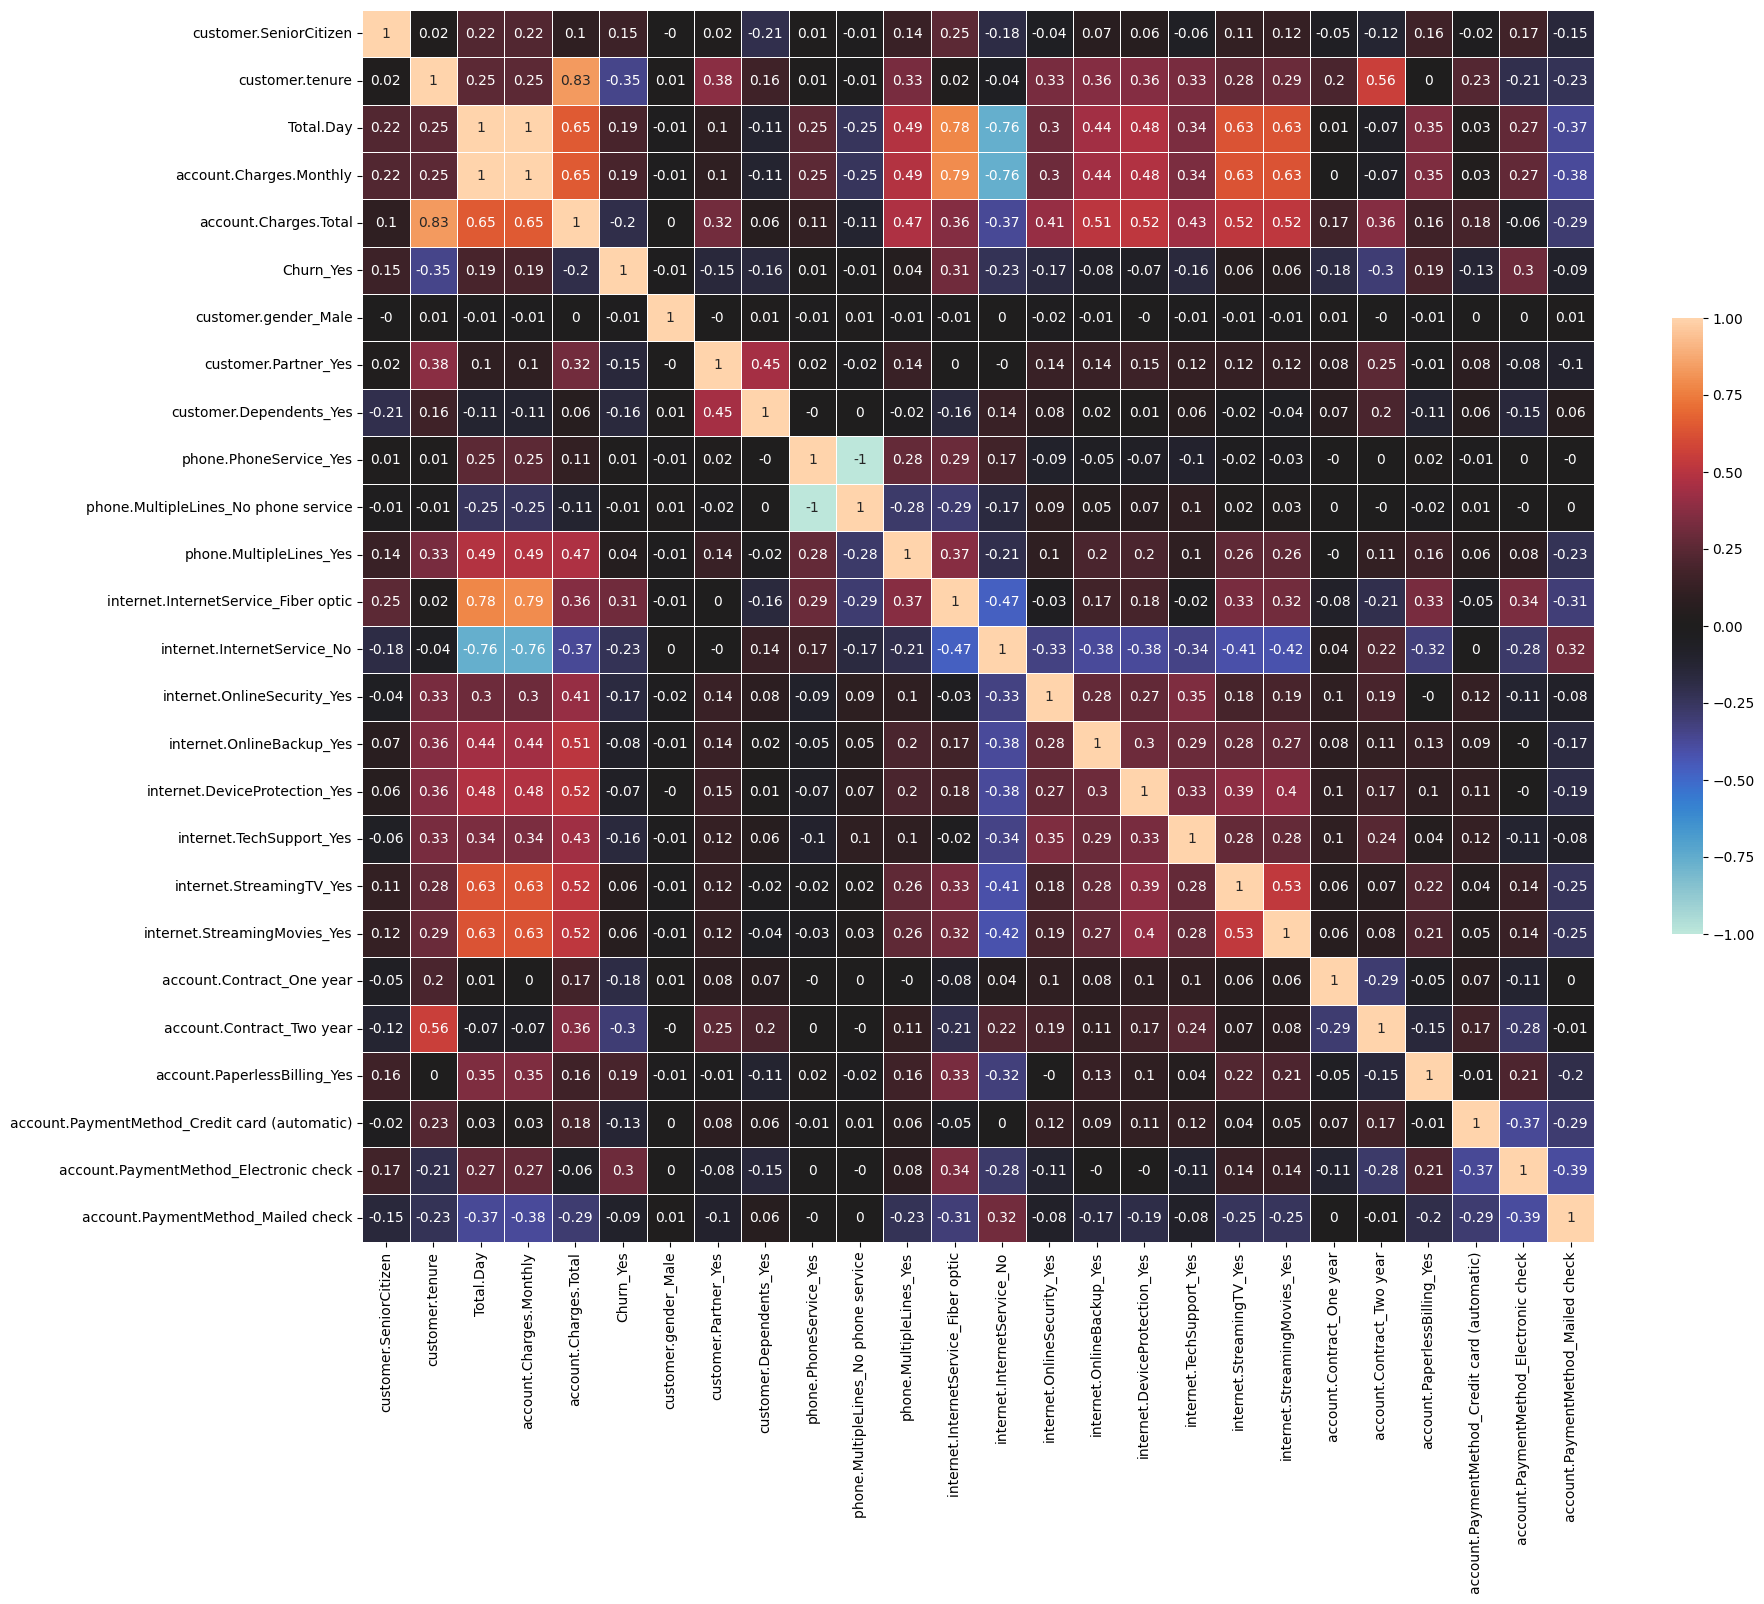

In [54]:
import numpy as np # Import the numpy library

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

Como esta visualización es algo difícil de interpretar, definiremos un u**mbral mínimo de correlación** para lograr identificar las variables con una correlación más fuerte y también ocultaremos la parte superior de la matriz, ya que es igual a la inferior y esto ayuda a tener una mejor visualización de las variables relevantes. Para ello usaremos **máscara para ocultar el triángulo superior** .

**Código:**

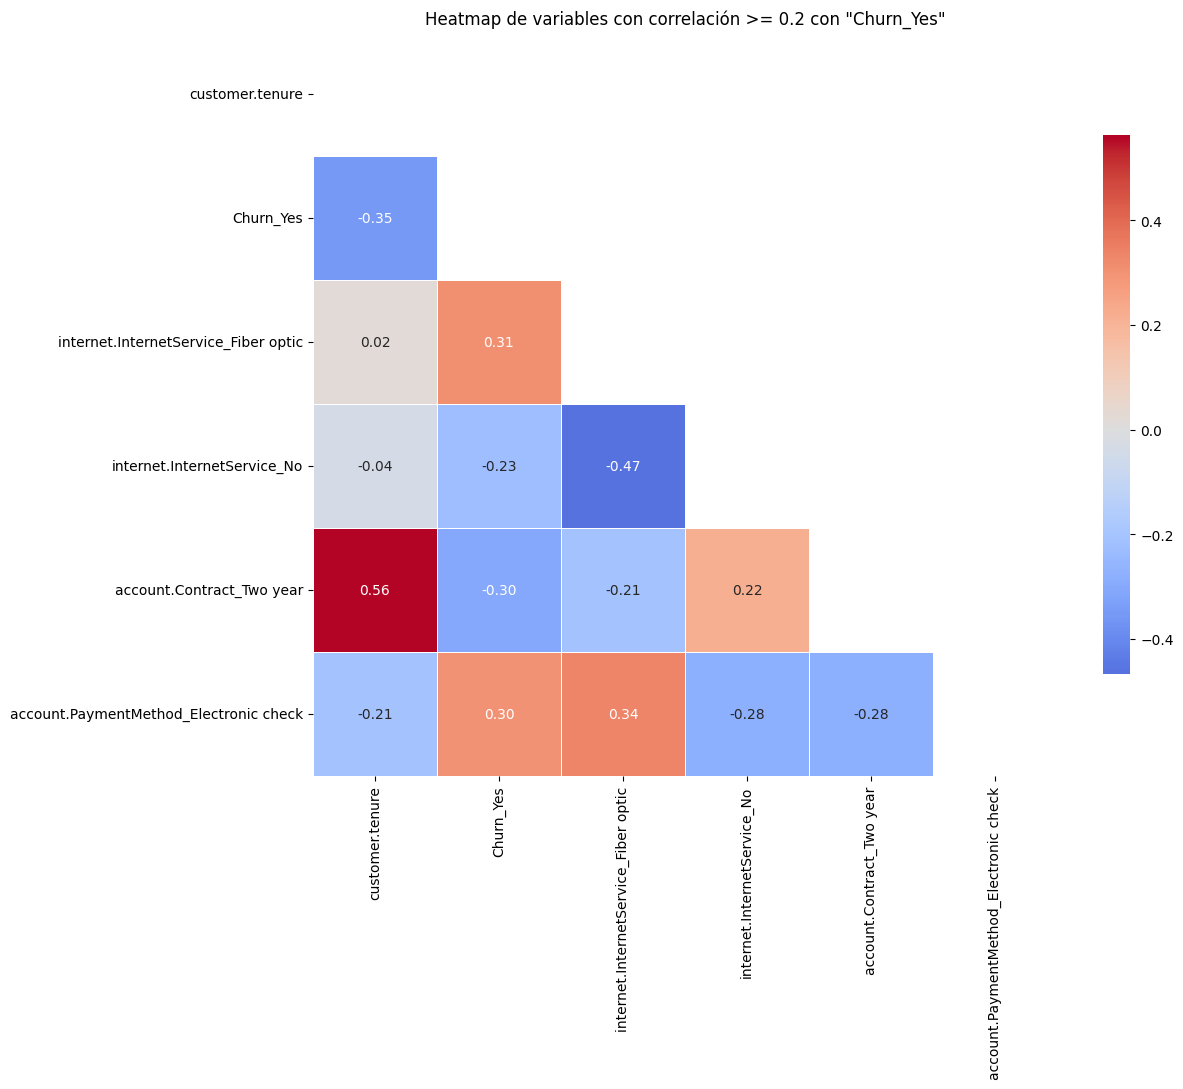

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
umbral = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = corr.index[abs(corr[target_var]) >= umbral].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variables_relevantes:
    variables_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {umbral} con "{target_var}"')
plt.show()

---

✅ **Análisis del nuevo heatmap de correlación**

> Recordando que el gráfico muestra **correlaciones ≥ 0.2** (o ≤ -0.2) con la variable objetivo `Churn_Yes`.

---

🔍 **Correlación con `Churn_Yes` (variable objetivo)**

| Variable                                 | Correlación con Churn\_Yes | Interpretación                                                                                                               |
| ---------------------------------------- | -------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| `internet.InternetService_Fiber optic`   | **+0.31**                  | Clientes con fibra óptica tienen **mayor probabilidad de churn**. Puede estar relacionado al costo o a la competitividad.    |
| `account.PaymentMethod_Electronic check` | **+0.30**                  | Pagos por cheque electrónico están asociados a más churn — quizás por perfil de cliente menos fidelizado.                    |
| `account.Contract_Two year`              | **-0.30**                  | Contratos de 2 años reducen el churn (clientes más comprometidos o con beneficios)                                           |
| `customer.tenure`                        | **-0.35**                  | Cuanto mayor el tiempo como cliente, menor la probabilidad de churn — esperado                                               |
| `internet.InternetService_No`            | **-0.23**                  | Quienes **no usan internet** tienden a churnar menos — posiblemente perfiles más estables (adultos mayores, menos digitales) |


**Análisis Dirigido**
En esta etapa buscaremos investigar si las cancelaciones (Churn) son afectados por dis variables en especial: Gasto Total y Tiempo de permanencia o contrato de los clientes

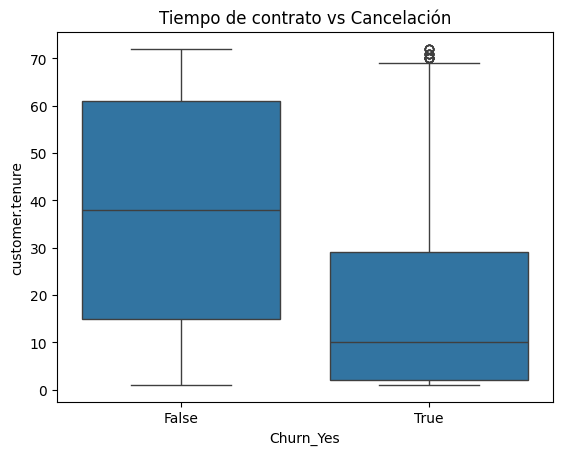

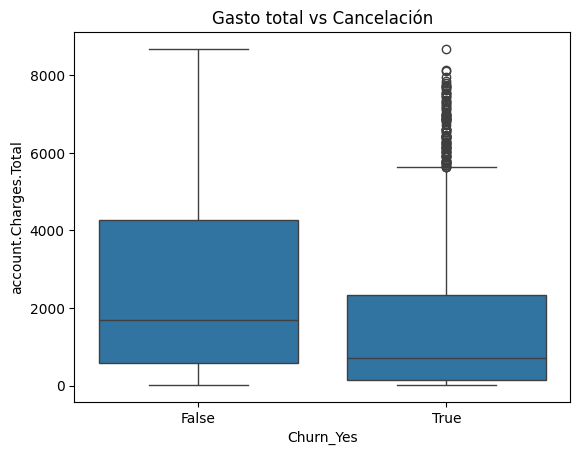

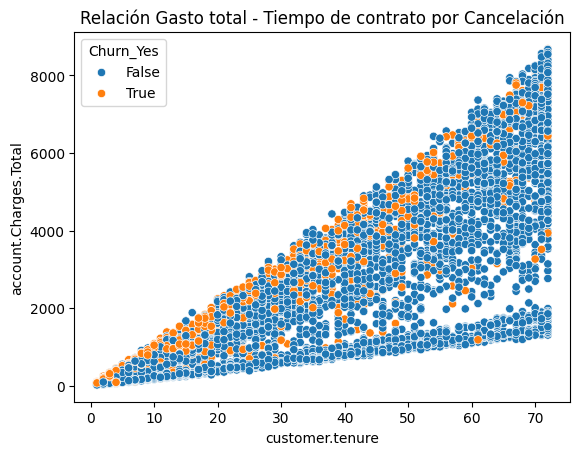

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Tiempo de contrato vs Cancelación
sns.boxplot(x='Churn_Yes', y='customer.tenure', data=df_encoded)
plt.title('Tiempo de contrato vs Cancelación')
plt.show()

# Boxplot: Gasto total vs Cancelación
sns.boxplot(x='Churn_Yes', y='account.Charges.Total', data=df_encoded)
plt.title('Gasto total vs Cancelación')
plt.show()

# Scatterplot: Gasto total vs Tiempo de contrato, coloreado por cancelación
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn_Yes', data=df_encoded)
plt.title('Relación Gasto total - Tiempo de contrato por Cancelación')
plt.show()

Podemos observar que las dos variables están relacionadas entre sí. Por lo tanto haremos un análisis **VIF (Factor de Inflación de la Varianza)**. Esto aplica siempre que vayamos a utilizar moddelos predictivos lineales, queramos interpretar los coeficientes o garantizar estabilidad en el modelo. Hay modelos que no son sensibles a la multicolinealidad como Árboles de decisión, Random Forest, XGBoost y Redes neuronales.

## 🔍 Análisis de Multicolinealidad


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df_encoded.drop(columns=['Churn_Yes'])
X_const = add_constant(X)

In [58]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


El criterio para evaluar si hay multicolinealidad usando el parámetro VIF es el siguiente:

| Rango de VIF       | Interpretación                |
| ------------------ | ----------------------------- |
| VIF ≈ 1            | Sin multicolinealidad         |
| 1 < VIF < 5        | Baja (aceptable)              |
| 5 ≤ VIF < 10       | Moderada (vigilar)            |
| VIF ≥ 10           | Alta (¡atención!)             |
| VIF = ∞ (infinito) | Multicolinealidad perfecta ⚠️ |



Por lo tanto, tenemos dos variables cuyo VIF es infinito: **phone.PhoneService_Yes** y **phone.MultipleLines_No** que son perfectamente colineales entre ellas. Dado que si el cliente no tiene teléfono no puede tener múltiples líneas, esto es redundante. Eliminamos la primera de ella PhoneService_Yes.

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

df_encoded = df_encoded.copy()
df_encoded.drop(columns=["phone.PhoneService_Yes"], inplace=True, errors="ignore")

Las siguientes de ellas son: 1) **account.Charges.Monthly** con un alto valor de VIF (992.62). Esta variable está **altamente correlacionada con `account.Charges.Total` y `Total.Day`**. Ya que **account.Charges.Total= account.charges.Monthly * customer.Tenure**

2) Escoger sólo una y eliminar el resto de las variables derivadas de internet: **InternetService_Fiberoptic, InternetService_No, internet.ServiceStreaming_Yes, internet.StreamingTV_Yes**, etc.).

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

df_encoded.drop(columns=["Total.Day"], inplace=True)
df_encoded.drop(columns=["internet.InternetService_No"], inplace=True)
df_encoded.drop(columns=["account.Charges.Total"])
df_encoded = df_encoded.astype(float)

**Volvemos a recalcular VIF:**

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

df_encoded = df_encoded.copy()
df_encoded = df_encoded.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = df_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]

display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
2,account.Charges.Monthly,45.344837
3,account.Charges.Total,19.218511
1,customer.tenure,17.508016
10,internet.InternetService_Fiber optic,9.218244
16,internet.StreamingMovies_Yes,3.383420
18,account.Contract_Two year,3.318609
15,internet.StreamingTV_Yes,3.309170
19,account.PaperlessBilling_Yes,2.959689
21,account.PaymentMethod_Electronic check,2.839858
6,customer.Partner_Yes,2.818794


Notamos que aun hay variables explicativas con multicolinealidad. Sin embargo la colinealidad crítica infinita ya no está presente. Procedemos a iterar nuevamente ahora eliminando la variable account.Charges.Monthly.

**VIF 2**

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_encoded = df_encoded.copy()
df_encoded.drop(columns=["account.Charges.Monthly"], inplace=True, errors="ignore")

vif_data_final = pd.DataFrame()
vif_data_final["feature"] = df_encoded.columns
vif_data_final["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]

display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
2,account.Charges.Total,18.259915
1,customer.tenure,16.265848
9,internet.InternetService_Fiber optic,3.776318
17,account.Contract_Two year,3.289113
15,internet.StreamingMovies_Yes,2.822273
5,customer.Partner_Yes,2.808317
14,internet.StreamingTV_Yes,2.786623
18,account.PaperlessBilling_Yes,2.756312
8,phone.MultipleLines_Yes,2.489182
20,account.PaymentMethod_Electronic check,2.373012


## 🤖 Modelos Predictivos


Separaremos el set de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Utilizaremos el modelo predictivo Regresión Logística y Random Forest. El primero de ellos es sensible a la multicolinealidad mientras que el segundo no lo es.

Importación de las bibliotecas

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

 Separar variables explicativas de variable objetivo

In [64]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/palmeiros/ChallengeTelecomX2/refs/heads/main/df_limpo.csv')
df.head()
df_encoded = pd.get_dummies(df, drop_first=True)

# Drop rows with null values after one-hot encoding
df_encoded = df_encoded.dropna()

X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

print(X.head())
print(y.head())

   customer.SeniorCitizen  customer.tenure  Total.Day  \
0                       0                9       2.20   
1                       0                9       2.01   
2                       0                4       2.34   
3                       1               13       3.17   
4                       1                3       2.97   

   account.Charges.Monthly  account.Charges.Total  customerID_0003-MKNFE  \
0                     65.6                 593.30                  False   
1                     59.9                 542.40                   True   
2                     73.9                 280.85                  False   
3                     98.0                1237.85                  False   
4                     83.9                 267.40                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False     

**Dividir entrenamiento y prueba**


In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

**Normalizar**

* Normalizaremos los datos para poder usar Regresión Logística, ya que este modelo es sensible a la escala o margnitud de los datos.

* En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.


In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balancear entrenamiento con SMOTE**

Porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.


In [67]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regresión Logística**


In [68]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("clf", LogisticRegression(random_state=42, class_weight="balanced", max_iter=1000))
])

pipe.fit(X_train, y_train)
y_prob = pipe.predict_proba(X_test)[:, 1]
tau = 0.25
y_pred = (y_prob >= tau).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1331  218]
 [ 228  333]]
              precision    recall  f1-score   support

       False       0.85      0.86      0.86      1549
        True       0.60      0.59      0.60       561

    accuracy                           0.79      2110
   macro avg       0.73      0.73      0.73      2110
weighted avg       0.79      0.79      0.79      2110



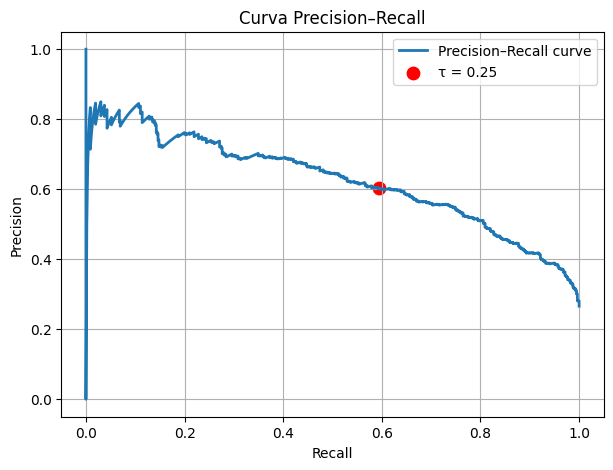

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Probabilidades del pipeline
y_prob = pipe.predict_proba(X_test)[:, 1]

# Calcular precision, recall y thresholds
prec, rec, thr = precision_recall_curve(y_test, y_prob)

# Graficar la curva
plt.figure(figsize=(7,5))
plt.plot(rec, prec, label="Precision–Recall curve", linewidth=2)

# Marcar el punto elegido en tau=0.25
tau = 0.25
y_pred_tau = (y_prob >= tau).astype(int)

# Buscar el punto más cercano a tau=0.25
import numpy as np
idx = np.argmin(np.abs(thr - tau))
plt.scatter(rec[idx], prec[idx], color="red", s=80, label=f"τ = {tau}")

# Decoración
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision–Recall")
plt.legend()
plt.grid(True)
plt.show()

**Interpretación:**

Accuracy (Exactitud): 0.79 (~79%)
→ El modelo acierta 8 de cada 10 en promedio.

ROC AUC: 0.83
→ Bien. Significa que el modelo distingue relativamente bien entre positivos y negativos.

Matriz de confusión:

•	Verdaderos Negativos (TN): 1331 → predijo bien los que NO eran churn.

•	Falsos Positivos (FP): 218 → dijo que sí era churn pero no.

•	Falsos Negativos (FN): 228 → dijo que no era churn pero sí lo era.

•	Verdaderos Positivos (TP): 333 → detectó correctamente los churn.

Reporte de Clasificación:

•	Para los que no cancelan (False) → el modelo mantiene buen rendimiento: precisión 0.85, recall 0.86, F1 de 0.86.
•	Para los que sí cancelan (True) → precisión 0.60, recall 0.59 → detecta 6 de cada 10 churn, con F1 de 0.60.
•	En general, el modelo quedó más balanceado entre las dos clases, sacrificando un poco de precisión en “no churn” para mejorar bastante la detección de “churn”.

**Random Forest**

In [70]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7862559241706161
ROC AUC: 0.8285950685221563
Matriz de Confusión:
 [[1348  201]
 [ 250  311]]
              precision    recall  f1-score   support

       False       0.84      0.87      0.86      1549
        True       0.61      0.55      0.58       561

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



Los resultados son muy parecido a los de la regresin logística:

•	Exactitud (accuracy): 0.79 (~79%) → (8 de cada 10 aciertos en total) igual que la regresión logística.

• ROC AUC: 0.83 → muy parecido al 0.83 de la logística, o sea que ambos modelos discriminan bien entre churn/no churn.

Matriz de confusión:

•	Verdaderos Negativos (TN): 1348 → predijo bien a los que no cancelan.

•	Falsos Positivos (FP): 201 → marcó churn donde no era.

•	Falsos Negativos (FN): 250 → dejó escapar churn reales.

•	Verdaderos Positivos (TP): 311 → detectó bien churn reales.

Reporte de clasificación:

•	Clase False (no churn) → precisión 0.84, recall 0.87, F1=0.86. Muy sólido.

•	Clase True (sí churn) → precisión 0.61 (de cada 10 que marca como churn, 6 sí lo son y 4 no), recall 0.55, F1=0.58.

👉 O sea, detecta un poco mejor que la logística ajustada (con τ=0.25 dio recall 0.59 y F1=0.60).

**Curva ROC**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


AUC Logística: 0.833
AUC RandomForest: 0.709


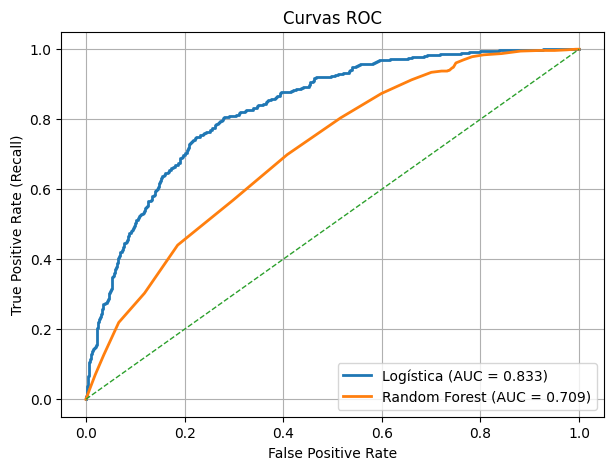

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# === Probabilidades de ambos modelos (intenta pipeline primero) ===
# Logística
try:
    y_prob_lr = pipe.predict_proba(X_test)[:, 1]          # si usaste Pipeline
except NameError:
    y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]     # si entrenaste fuera del Pipeline

# Random Forest (usa X_test si existe; si no, X_test_scaled)
try:
    y_prob_rf = rf.predict_proba(X_test)[:, 1]
except NameError:
    y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# === Curvas ROC ===
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

print(f"AUC Logística: {auc_lr:.3f}")
print(f"AUC RandomForest: {auc_rf:.3f}")

# === Plot ROC ===
plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logística (AUC = {auc_lr:.3f})", linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})", linewidth=2)
plt.plot([0,1], [0,1], linestyle="--", linewidth=1)  # línea azar
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curvas ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Interpretación**

El que tenga AUC más alto separa mejor en promedio todos los umbrales. Luego se elige τ según negocio (ej. subir recall de churn)

**Evaluar Modelos**

**Overfitting vs. Underfitting**

**Regresión Logística**

In [75]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np

# OJO: se usa X, y crudos (sin escalar) porque el Pipeline escala adentro
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

pipe_lr = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("clf", LogisticRegression(random_state=42, class_weight="balanced", max_iter=1000))
])

scores_lr = cross_validate(
    pipe_lr, X, y,
    cv=cv,
    scoring=["roc_auc", "accuracy"],
    return_train_score=True,
    n_jobs=-1
)

print("=== Logistic Regression (CV=3) ===")
print(f"Train AUC  mean={scores_lr['train_roc_auc'].mean():.3f}  std={scores_lr['train_roc_auc'].std():.3f}")
print(f"Test  AUC  mean={scores_lr['test_roc_auc'].mean():.3f}   std={scores_lr['test_roc_auc'].std():.3f}")
print(f"Train ACC  mean={scores_lr['train_accuracy'].mean():.3f} std={scores_lr['train_accuracy'].std():.3f}")
print(f"Test  ACC  mean={scores_lr['test_accuracy'].mean():.3f}  std={scores_lr['test_accuracy'].std():.3f}")

=== Logistic Regression (CV=3) ===
Train AUC  mean=1.000  std=0.000
Test  AUC  mean=0.836   std=0.004
Train ACC  mean=1.000 std=0.000
Test  ACC  mean=0.794  std=0.004


**Interpretación**
  
  Train AUC = 1.000 y ACC = 1.000 → el modelo en train es perfecto, predice todo bien.
  Brecha grande (1.000 vs 0.836) → esto indica overfitting.
  El modelo generaliza regularmente bien (AUC 0.83).
  Pero el overfitting existe

  🔧 Cómo reducir el overfitting:


In [76]:
LogisticRegression(C=0.1, penalty="l2", class_weight="balanced", max_iter=1000)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)

In [77]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np

# OJO: se usa X, y crudos (sin escalar) porque el Pipeline escala adentro
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

pipe_lr = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("clf", LogisticRegression(C=0.1, random_state=42, class_weight="balanced", max_iter=1000))
])

scores_lr = cross_validate(
    pipe_lr, X, y,
    cv=cv,
    scoring=["roc_auc", "accuracy"],
    return_train_score=True,
    n_jobs=-1
)

print("=== Logistic Regression (CV=3) ===")
print(f"Train AUC  mean={scores_lr['train_roc_auc'].mean():.3f}  std={scores_lr['train_roc_auc'].std():.3f}")
print(f"Test  AUC  mean={scores_lr['test_roc_auc'].mean():.3f}   std={scores_lr['test_roc_auc'].std():.3f}")
print(f"Train ACC  mean={scores_lr['train_accuracy'].mean():.3f} std={scores_lr['train_accuracy'].std():.3f}")
print(f"Test  ACC  mean={scores_lr['test_accuracy'].mean():.3f}  std={scores_lr['test_accuracy'].std():.3f}")

=== Logistic Regression (CV=3) ===
Train AUC  mean=1.000  std=0.000
Test  AUC  mean=0.837   std=0.004
Train ACC  mean=1.000 std=0.000
Test  ACC  mean=0.794  std=0.003


Dado que el modelo no mejoró probamos ahora con: SMOTE sampling_strategy=0.5 en lugar de al 100

In [80]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(sampling_strategy=0.5, random_state=42)),
    ("clf", LogisticRegression(random_state=42, class_weight="balanced", max_iter=1000))
])

pipe.fit(X_train, y_train)
y_prob = pipe.predict_proba(X_test)[:, 1]
tau = 0.25
y_pred = (y_prob >= tau).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1319  230]
 [ 211  350]]
              precision    recall  f1-score   support

       False       0.86      0.85      0.86      1549
        True       0.60      0.62      0.61       561

    accuracy                           0.79      2110
   macro avg       0.73      0.74      0.74      2110
weighted avg       0.79      0.79      0.79      2110



**Conlusion:**

Clase False (no churn): precisión 0.86, recall 0.85 → sigue muy sólido.

Clase True (sí churn): precisión 0.60, recall 0.62, F1=0.61 → mucho mejor que antes (cuando recall estaba en 0.41 o 0.55).

Accuracy global = 0.79, se mantiene igual, pero ahora está más balanceado entre clases.

Macro avg / Weighted avg ~0.74–0.79, lo que indica buen equilibrio entre las dos clases.

  
**Se eliminó el train=1.00 vs test=0.79 extremo (overfitting).**

**El recall de churn (el objetivo de negocio) subió de 0.41 → 0.62 → ahora detectas 6 de cada 10 clientes que se van.**

**Random Forest**


In [81]:
# === Random Forest modificado incluyendo validación cruzada para detectar over/underfitting ===
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np

# CV
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

pipe_rf_tuned = Pipeline(steps=[
    ("smote", SMOTE(sampling_strategy=0.5, random_state=42)),  # SMOTE parcial
    ("clf", RandomForestClassifier(
        n_estimators=300,              # potencia razonable
        max_depth=10,                  # limita complejidad (menos overfit)
        min_samples_split=20,
        min_samples_leaf=5,
        max_features="sqrt",
        bootstrap=True,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ))
])
# Métricas clave (AUC no depende de umbral; accuracy/recall/f1 sí)
scores = cross_validate(
    pipe_rf_tuned, X, y,
    cv=cv,
    scoring=["roc_auc", "accuracy", "recall", "f1"],
    return_train_score=True,
    n_jobs=-1
)
print("=== Random Forest (tuneado) – CV=3 ===")
for m in ["roc_auc", "accuracy", "recall", "f1"]:
    tr_mean, tr_std = scores[f"train_{m}"].mean(), scores[f"train_{m}"].std()
    te_mean, te_std = scores[f"test_{m}"].mean(),  scores[f"test_{m}"].std()
    gap = tr_mean - te_mean
    print(f"{m.upper():9s} | Train: {tr_mean:.3f}±{tr_std:.3f}  Test: {te_mean:.3f}±{te_std:.3f}  Gap: {gap:.3f}")

# Diagnóstico rápido
tr_auc = scores["train_roc_auc"].mean()
te_auc = scores["test_roc_auc"].mean()
gap_auc = tr_auc - te_auc

print("\nDiagnóstico (AUC):")
if tr_auc > 0.90 and gap_auc >= 0.05:
    print("→ Overfitting: Train muy alto vs Test. Considera reducir complejidad (menor max_depth, mayor min_samples_leaf/split).")
elif tr_auc < 0.75 and te_auc < 0.75:
    print("→ Underfitting: ambos bajos. Agrega señales/feats o sube complejidad (más trees, mayor max_depth).")
else:
    print("→ Balanceado: train y test cercanos y decentes. Buen generalizado.")

=== Random Forest (tuneado) – CV=3 ===
ROC_AUC   | Train: 0.825±0.005  Test: 0.820±0.006  Gap: 0.005
ACCURACY  | Train: 0.682±0.024  Test: 0.680±0.019  Gap: 0.002
RECALL    | Train: 0.866±0.014  Test: 0.859±0.020  Gap: 0.007
F1        | Train: 0.592±0.015  Test: 0.588±0.010  Gap: 0.004

Diagnóstico (AUC):
→ Balanceado: train y test cercanos y decentes. Buen generalizado.


⚖️ ¿Cuál es mejor?
	•	Si a negocio le importa recall (detectar a los que se van, aunque te equivoques en algunos que no se iban) →
Random Forest modificado es mejor (recall 0.86 vs 0.62).
	•	Si el negocio prefiere precisión global (menos falsos positivos, más exactitud total) → Logistic Regression es mejor (accuracy 0.79 vs 0.68, AUC ligeramente mejor).

**Análisis de las variables (Importancia)**

Regresión Lineal:

	La regresión logística nos da coeficientes (β).
	•	Coeficiente positivo → aumenta la probabilidad de churn.
	•	Coeficiente negativo → protege, reduce churn.
	•	Magnitud → qué tan fuerte es la influencia.
  
• internet.InternetService_Fiber optic (0.55) → clientes con fibra óptica son más propensos a cancelar.

•	account.PaymentMethod_Electronic check (0.49) → quienes pagan con cheque electrónico también tienen mayor churn.

•	customer.tenure (-0.72) → a mayor antigüedad, mucho menos churn (los más fieles).

•	account.Contract_Two year (-0.47) → contratos largos retienen al cliente.

👉 En resumen, los que más se van son los nuevos (poco tenure), pagan poco y con e-check, además de quienes tienen fibra óptica y facturación electrónica.

Random Forest

Random Forest no da coeficientes, sino importancia relativa de variables (qué tanto ayuda cada variable a reducir la impureza al dividir nodos).

Usaremos un código para descubrirlo.

In [82]:
import pandas as pd

# Importancia de variables en Random Forest
importancias = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print(importancias.head(15))  # top 15 más relevantes

                                    Variable  Importancia
1                            customer.tenure     0.080826
4                      account.Charges.Total     0.077311
3                    account.Charges.Monthly     0.060424
2                                  Total.Day     0.055560
7068               account.Contract_Two year     0.036636
7071  account.PaymentMethod_Electronic check     0.032689
7062                internet.TechSupport_Yes     0.026837
7067               account.Contract_One year     0.026118
7053    internet.InternetService_Fiber optic     0.025862
7048                    customer.Partner_Yes     0.024606
7056             internet.OnlineSecurity_Yes     0.020883
7069            account.PaperlessBilling_Yes     0.020387
7049                 customer.Dependents_Yes     0.015783
7047                    customer.gender_Male     0.015693
7058               internet.OnlineBackup_Yes     0.014904


Estos valores son como un ranking porcentual o peso relativo:

customer.tenure (0.0808) → el tiempo con la empresa es lo más importante.

account.Charges.Total (0.0773) y account.Charges.Monthly (0.0604) → lo que pagan los clientes pesa mucho en la predicción.

Total.Day (0.0556) → consumo/duración de servicio diario también relevante.

account.Contract_Two year (0.0366) y One year (0.0261) → tener contrato más largo reduce churn.

PaymentMethod_Electronic check (0.0326) y PaperlessBilling_Yes (0.0203) → formas de pago también son factores.

Servicios de soporte y seguridad (TechSupport_Yes, OnlineSecurity_Yes) bajan el churn.

👉 Interpretación: RF está diciendo “lo que más importa es cuánto tiempo lleva el cliente en la empresa y cuánto paga; después, qué contrato tiene y qué servicios adicionales usa”.

**Resumen y** **conclusiones**

📊 Conclusiones (tenure bajo + pagan menos):
	•	Tenure corto → los clientes más nuevos son los que más se van. Eso suele pasar porque todavía no generan apego con la empresa, no han probado bien el servicio, o encuentran algo mejor rápido.
	•	Pagos bajos → los de ticket chico (planes baratos, menor facturación) son más sensibles a irse porque les cuesta menos cambiar de proveedor, y la empresa los puede descuidar por enfocarse en los de mayor ingreso.

📌 Qué hacer con esto en Telecom X:
	1.	Onboarding fuerte: cuidar a los clientes recién llegados, darles beneficios, tutoriales, descuentos iniciales, contacto humano rápido.
	2.	Upsell / engagement: si pagan menos, buscar engancharlos con algo que les suba el valor (mejores planes, beneficios exclusivos) y los haga sentir que pierden algo si se van.
	3.	Alertas tempranas: usar el modelo para detectar justo esos perfiles (nuevo + bajo gasto) y mandarles campañas personalizadas.

✋ Estrategias:

Garantiar que los nuevos clientes obtengan un contrato por largo plazo con promociones atrtactivas en su servicio contratado.

De forma consistente reforzar la fibra óptica en soporte técnico con el fin de que sea la privilegiada por los clientes, y al mismo tiempo la que mayor ingresos proporciona a la empresa. Se observó que esta variable es importante en el modelo.

Si tuviera la empresa qu elegir entre modelos yo recomiendo regresión logística por su facilidad para interpretar el peso de cada variable, mientras que RF es un poco menos transparente, aunque es un buen modelo explicativo.

Incluir más variables en el modelo en el futuro: interacciones con soporte, quejas, frecuencia de uso, etc.

Validación más fuerte a futuro: validación temporal simulando el futuro (entrenar en clientes viejos y pruebar en clientes nuevos).

Balanceo más realista a futuro: SMOTE está bien para pruebas, pero en producción lo ideal es conseguir más ejemplos reales de churn (clientes que realmente se fueron).

Calibrar el umbral (τ): Probar con otros valores además del default 0.5, esto ayuda a maximizar el recall a costa de perder algo de predicción. En el ejercicio ajustamos a 0.25 y vimos que mejoró.

Generar un score de churn para cada cliente cada mes/semana.
Marcar los de score alto y pasarlos a marketing/retención para llamadas o promos.
Guardar resultados: ¿los clientes predichos como churn realmente se fueron o no?

Dividir tu dataset en train pasado (ej. clientes 2023) y test futuro (ej. clientes 2024).
Si el modelo mantiene AUC/Recall similar → está listo para producción.
  
Reentrenar el modelo cada X meses con los datos más recientes.
Revisar las variables más predictivas → ajustar campañas (ej. si “poco tenure” = riesgo, enfocarse en fidelizar a los nuevos).
Probar modelos más avanzados (XGBoost, LightGBM, Redes Neuronales) cuando haya más datos